<a href="https://colab.research.google.com/github/Sathsarani0412/Dyscalculia_Detection_App_Hapan_Mithuro-/blob/main/model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier


In [ ]:
from google.colab import files
files.upload()


Saving dyscalculia_natural_dataset.csv to dyscalculia_natural_dataset.csv


{'dyscalculia_natural_dataset.csv': b'activity1_score,activity1_time,activity2_score,activity2_time,activity3_score,activity3_time,activity4_score,activity4_time,activity5_score,activity5_time,activity6_score,activity6_time,activity7_score,activity7_time,activity8_score,activity8_time,activity9_score,activity9_time,accuracy_rate,skipped_rate,difficulty_score,label\n1,26,1,43,1,43,1,52,1,33,1,33,1,10,1,51,1,34,1.0,0.0,3,no\n1,31,1,32,1,47,1,41,1,33,1,32,1,51,1,27,1,38,1.0,0.0,3,no\n1,37,1,44,1,73,1,54,-1,42,0,50,1,27,1,21,0,23,0.6666666666666666,0.2222222222222222,1,no\n1,29,1,46,1,50,0,37,1,32,0,21,1,53,1,54,1,29,0.7777777777777778,0.2222222222222222,2,no\n0,27,1,39,0,57,1,44,1,35,1,39,1,22,1,52,0,33,0.6666666666666666,0.3333333333333333,2,no\n0,22,1,37,1,34,0,46,0,53,0,56,0,42,1,36,1,35,0.4444444444444444,0.5555555555555556,2,no\n0,10,1,44,1,45,1,38,1,28,-1,56,-1,39,1,19,1,41,0.6666666666666666,0.1111111111111111,2,no\n1,34,1,45,1,36,1,44,1,39,1,30,1,49,1,56,1,56,1.0,0.0,3,no\n1,34,1,

In [ ]:
import os
os.listdir()


['.config', 'dyscalculia_natural_dataset.csv', 'sample_data']

In [ ]:
import pandas as pd

df = pd.read_csv("dyscalculia_natural_dataset.csv")
df.head()


,activity1_score,activity1_time,activity2_score,activity2_time,activity3_score,activity3_time,activity4_score,activity4_time,activity5_score,activity5_time,...,activity7_score,activity7_time,activity8_score,activity8_time,activity9_score,activity9_time,accuracy_rate,skipped_rate,difficulty_score,label
0,1,26,1,43,1,43,1,52,1,33,...,1,10,1,51,1,34,1.000000,0.000000,3,no
1,1,31,1,32,1,47,1,41,1,33,...,1,51,1,27,1,38,1.000000,0.000000,3,no
2,1,37,1,44,1,73,1,54,-1,42,...,1,27,1,21,0,23,0.666667,0.222222,1,no
3,1,29,1,46,1,50,0,37,1,32,...,1,53,1,54,1,29,0.777778,0.222222,2,no
4,0,27,1,39,0,57,1,44,1,35,...,1,22,1,52,0,33,0.666667,0.333333,2,no


In [ ]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   activity1_score   240 non-null    int64  
 1   activity1_time    240 non-null    int64  
 2   activity2_score   240 non-null    int64  
 3   activity2_time    240 non-null    int64  
 4   activity3_score   240 non-null    int64  
 5   activity3_time    240 non-null    int64  
 6   activity4_score   240 non-null    int64  
 7   activity4_time    240 non-null    int64  
 8   activity5_score   240 non-null    int64  
 9   activity5_time    240 non-null    int64  
 10  activity6_score   240 non-null    int64  
 11  activity6_time    240 non-null    int64  
 12  activity7_score   240 non-null    int64  
 13  activity7_time    240 non-null    int64  
 14  activity8_score   240 non-null    int64  
 15  activity8_time    240 non-null    int64  
 16  activity9_score   240 non-null    int64  
 1

,activity1_score,activity1_time,activity2_score,activity2_time,activity3_score,activity3_time,activity4_score,activity4_time,activity5_score,activity5_time,...,activity6_time,activity7_score,activity7_time,activity8_score,activity8_time,activity9_score,activity9_time,accuracy_rate,skipped_rate,difficulty_score
count,240.00000,240.000000,240.00000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,...,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.00000
mean,0.18750,90.195833,0.18750,86.391667,0.250000,88.575000,0.275000,89.995833,0.241667,90.883333,...,90.358333,0.254167,90.075000,0.137500,90.320833,0.179167,90.187500,0.450926,0.304167,1.23750
std,0.79896,54.003169,0.81964,49.774268,0.810496,50.694947,0.781186,52.867918,0.818160,50.892319,...,53.332037,0.827093,52.081472,0.782824,50.580244,0.811259,52.293209,0.285430,0.159494,1.01343
min,-1.00000,10.000000,-1.00000,13.000000,-1.000000,13.000000,-1.000000,15.000000,-1.000000,18.000000,...,10.000000,-1.000000,10.000000,-1.000000,10.000000,-1.000000,18.000000,0.000000,0.000000,0.00000
25%,0.00000,45.500000,-1.00000,44.000000,0.000000,46.000000,0.000000,45.500000,0.000000,46.000000,...,47.750000,0.000000,46.750000,0.000000,47.000000,-1.000000,46.000000,0.222222,0.222222,0.00000
50%,0.00000,77.500000,0.00000,74.500000,0.000000,79.000000,0.000000,79.000000,0.000000,78.000000,...,74.000000,0.500000,81.000000,0.000000,81.000000,0.000000,78.000000,0.444444,0.333333,1.00000
75%,1.00000,131.500000,1.00000,120.250000,1.000000,122.250000,1.000000,127.000000,1.000000,128.500000,...,133.000000,1.000000,129.000000,1.000000,130.000000,1.000000,130.500000,0.666667,0.444444,2.00000
max,1.00000,257.000000,1.00000,213.000000,1.000000,222.000000,1.000000,239.000000,1.000000,235.000000,...,223.000000,1.000000,239.000000,1.000000,218.000000,1.000000,242.000000,1.000000,0.777778,3.00000


In [ ]:
print(df.isnull().sum())

# If any missing values exist
df = df.fillna(df.median(numeric_only=True))


activity1_score     0
activity1_time      0
activity2_score     0
activity2_time      0
activity3_score     0
activity3_time      0
activity4_score     0
activity4_time      0
activity5_score     0
activity5_time      0
activity6_score     0
activity6_time      0
activity7_score     0
activity7_time      0
activity8_score     0
activity8_time      0
activity9_score     0
activity9_time      0
accuracy_rate       0
skipped_rate        0
difficulty_score    0
label               0
dtype: int64


In [ ]:
df.head()

,activity1_score,activity1_time,activity2_score,activity2_time,activity3_score,activity3_time,activity4_score,activity4_time,activity5_score,activity5_time,...,activity7_score,activity7_time,activity8_score,activity8_time,activity9_score,activity9_time,accuracy_rate,skipped_rate,difficulty_score,label
0,1,26,1,43,1,43,1,52,1,33,...,1,10,1,51,1,34,1.000000,0.000000,3,no
1,1,31,1,32,1,47,1,41,1,33,...,1,51,1,27,1,38,1.000000,0.000000,3,no
2,1,37,1,44,1,73,1,54,-1,42,...,1,27,1,21,0,23,0.666667,0.222222,1,no
3,1,29,1,46,1,50,0,37,1,32,...,1,53,1,54,1,29,0.777778,0.222222,2,no
4,0,27,1,39,0,57,1,44,1,35,...,1,22,1,52,0,33,0.666667,0.333333,2,no


In [ ]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)


In [ ]:
label_map = {"no": 0, "mild": 1, "high": 2}
df["label"] = df["label"].map(label_map)


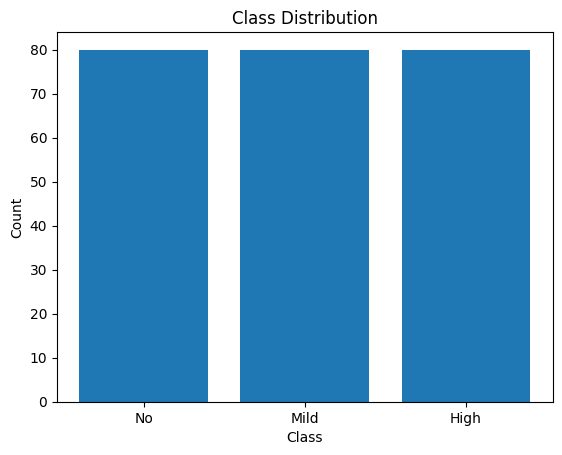

In [ ]:
class_counts = df["label"].value_counts().sort_index()

plt.bar(["No", "Mild", "High"], class_counts)
plt.title("Class Distribution")
plt.ylabel("Count")
plt.xlabel("Class")
plt.show()


In [ ]:
df.head()

,activity1_score,activity1_time,activity2_score,activity2_time,activity3_score,activity3_time,activity4_score,activity4_time,activity5_score,activity5_time,...,activity7_score,activity7_time,activity8_score,activity8_time,activity9_score,activity9_time,accuracy_rate,skipped_rate,difficulty_score,label
0,-1,43,1,26,-1,43,1,43,1,38,...,0,58,0,43,0,36,0.333333,0.444444,0,0
1,0,10,1,44,1,45,1,38,1,28,...,-1,39,1,19,1,41,0.666667,0.111111,2,0
2,0,67,0,24,1,96,1,63,1,77,...,1,91,0,73,1,85,0.555556,0.444444,1,1
3,0,95,1,74,0,31,-1,109,0,92,...,1,76,0,75,1,38,0.333333,0.555556,1,1
4,1,77,-1,104,0,87,1,64,0,71,...,1,107,0,100,1,100,0.444444,0.333333,1,1


In [ ]:
X = df.drop(columns=["label"])
y = df["label"]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [ ]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)

svm = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf", probability=True, random_state=42))
])

xgb = XGBClassifier(
    n_estimators=200,
    max_depth=4,
    learning_rate=0.05,
    eval_metric="mlogloss",
    random_state=42
)

mlp = Pipeline([
    ("scaler", StandardScaler()),
    ("mlp", MLPClassifier(hidden_layer_sizes=(128,64), max_iter=600, random_state=42))
])

base_models = [rf, svm, xgb, mlp]


In [ ]:
from sklearn.model_selection import cross_val_score

print("Doing 5-fold cross validation:\n")

model_names = [
    "Random Forest",
    "SVM",
    "XGBoost",
    "MLP"
]

for model, name in zip(base_models, model_names):
    scores = cross_val_score(
        model,
        X_train,
        y_train,
        cv=5,
        scoring="accuracy"
    )
    print(
        f"Accuracy: {scores.mean():.3f} (+/- {scores.std():.3f}) [{name} Model]"
    )


Doing 5-fold cross validation:

Accuracy: 0.995 (+/- 0.011) [Random Forest Model]
Accuracy: 1.000 (+/- 0.000) [SVM Model]
Accuracy: 0.974 (+/- 0.028) [XGBoost Model]
Accuracy: 0.995 (+/- 0.011) [MLP Model]


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

stack_scores = []

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_idx, val_idx in skf.split(X_train, y_train):

    X_tr = X_train.iloc[train_idx]
    X_val = X_train.iloc[val_idx]

    y_tr = y_train.iloc[train_idx]
    y_val = y_train.iloc[val_idx]

    # Create OOF features for this fold
    oof_tr = np.zeros((X_tr.shape[0], len(base_models)))
    oof_val = np.zeros((X_val.shape[0], len(base_models)))

    for i, model in enumerate(base_models):
        model.fit(X_tr, y_tr)
        oof_tr[:, i] = model.predict(X_tr)
        oof_val[:, i] = model.predict(X_val)

    # Meta learner
    meta = LogisticRegression(max_iter=1000)
    meta.fit(oof_tr, y_tr)

    # 🔥 VALIDATION STEP (exactly what you asked)
    val_preds = meta.predict(oof_val)
    acc = accuracy_score(y_val, val_preds)
    stack_scores.append(acc)

print(
    f"Stacked Model CV Accuracy: "
    f"{np.mean(stack_scores):.3f} (+/- {np.std(stack_scores):.3f})"
)


Stacked Model CV Accuracy: 1.000 (+/- 0.000)


In [ ]:
final_preds = meta_model.predict(oof_test)

print("Final Accuracy:", accuracy_score(y_test, final_preds))

print("\nClassification Report:\n")
print(classification_report(
    y_test, final_preds,
    target_names=["No Dyscalculia", "Mild Dyscalculia", "High Dyscalculia"]
))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, final_preds))


Final Accuracy: 1.0

Classification Report:

                  precision    recall  f1-score   support

  No Dyscalculia       1.00      1.00      1.00        16
Mild Dyscalculia       1.00      1.00      1.00        16
High Dyscalculia       1.00      1.00      1.00        16

        accuracy                           1.00        48
       macro avg       1.00      1.00      1.00        48
    weighted avg       1.00      1.00      1.00        48


Confusion Matrix:

[[16  0  0]
 [ 0 16  0]
 [ 0  0 16]]


In [ ]:
for model in base_models:
    model.fit(X_train, y_train)


In [ ]:
import joblib

joblib.dump(base_models, "base_models.pkl")
joblib.dump(meta_model, "meta_model.pkl")


['meta_model.pkl']

In [ ]:
base_models = joblib.load("base_models.pkl")
meta_model = joblib.load("meta_model.pkl")


In [ ]:
import pandas as pd

input_data = pd.DataFrame([{
    "activity1_score": 1,
    "activity2_score": 0,
    "activity3_score": 1,
    "activity4_score": 1,
    "activity5_score": 0,
    "activity6_score": -1,
    "activity7_score": 0,
    "activity8_score": -1,
    "activity9_score": -1,

    "activity1_time": 35,
    "activity2_time": 40,
    "activity3_time": 45,
    "activity4_time": 50,
    "activity5_time": 55,
    "activity6_time": 120,
    "activity7_time": 90,
    "activity8_time": 140,
    "activity9_time": 150,

    "accuracy_rate": 0.45,
    "skipped_rate": 0.22,
    "difficulty_score": 2
}])


In [ ]:
feature_names = X_train.columns.tolist()
joblib.dump(feature_names, "feature_names.pkl")


['feature_names.pkl']

In [ ]:
feature_names = joblib.load("feature_names.pkl")


In [ ]:
input_data = input_data[feature_names]


In [ ]:
import numpy as np

base_preds = np.zeros((1, len(base_models)))

for i, model in enumerate(base_models):
    base_preds[0, i] = model.predict(input_data)[0]


In [ ]:
final_prediction = meta_model.predict(base_preds)[0]


In [ ]:
label_map_reverse = {
    0: "No Dyscalculia",
    1: "Mild Dyscalculia",
    2: "High Dyscalculia"
}

print("Predicted Dyscalculia Level:", label_map_reverse[final_prediction])


Predicted Dyscalculia Level: Mild Dyscalculia
